# Heart Disease Prediction - Case Study 2

**Data Processing for case study 2**

**Import**

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [181]:
df = pd.read_csv('heart.csv')

In [182]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Attribute Information:

- age
- sex (1=male,0=female)
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target:0 for no presence of heart disease, 1 for presence of heart disease

# Exploratory Data Analysis

In [96]:
#Change the column names to lowercase
df.columns = map(str.lower, df.columns)

#Replace space in columns with underscore
df.columns = df.columns.str.replace('\s+','_')

In [97]:
#Total number of rows and columns of the dataframe
print('Data: \n')
print("Number of columns : "+str(df.shape[1]))
print("Number of rows : "+str(df.shape[0]))

Data: 

Number of columns : 14
Number of rows : 303


In [98]:
# Check the data type and if missing value exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [99]:
# Comparing the number of unique data from the data description if there are outliers exist
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

**'thal' should have 3 unique data while 'ca' should have 4 unique data**

In [100]:
# A simple statistic description of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


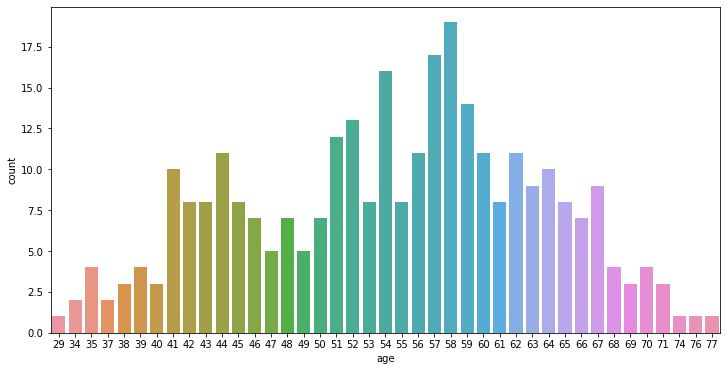

In [101]:
# Find the minumum, maximum and average age of the patients
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=df);

min age = 25

max age = 77 

mean age = 54

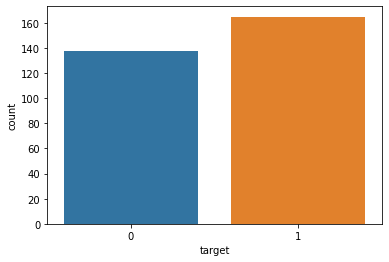

In [102]:
# Calculating total the absence(0) and presence(1) of heart disease
sns.countplot(x='target',data=df);

The dataset had more patient with heart disease

In [103]:
# Create a pie chart to visualize total of target 
presence =[138,165]
labels = ['no heart disease','with heart disease']

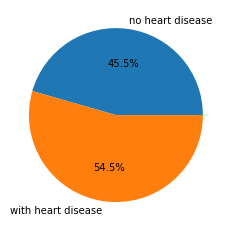

In [104]:
plt.axis=['equal']
plt.pie(presence,labels=labels,radius=1.0,autopct='%0.1f%%');

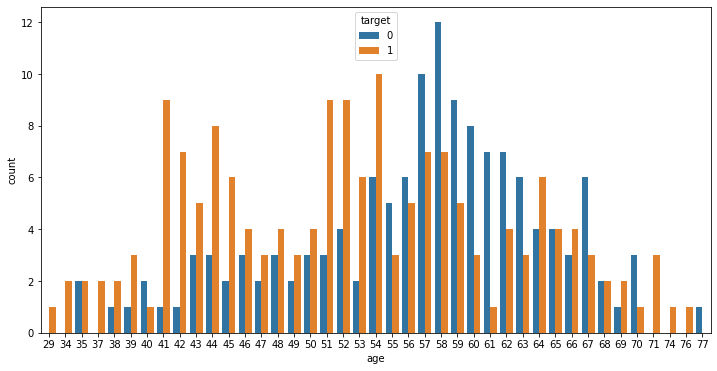

In [105]:
# Use count plot to visualize the target for heart disease by patients' age
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=df,hue='target');

More patient with heart disease for patient age range of 40-54

More patient without heart disease for patient age range 55-70

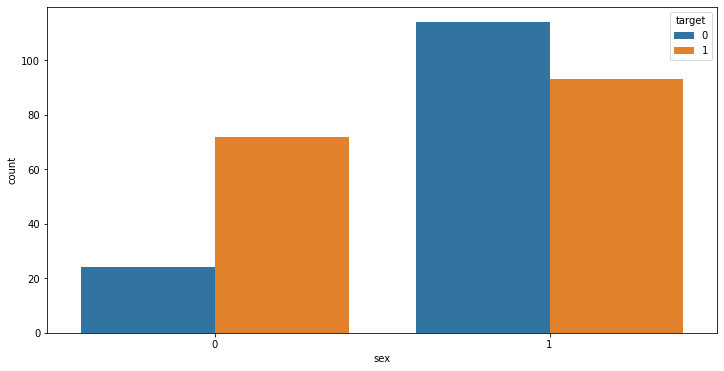

In [106]:
# Use count plot to visualize the target for heart disease by patients' gender
plt.figure(figsize=(12,6))
sns.countplot(x='sex',data=df,hue='target');

1=male,0=female

The dataset had more male patients

Female had more patients with heart disease

Male had more patients without heart disease

In [107]:
# Find correlation between features and label(target)
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

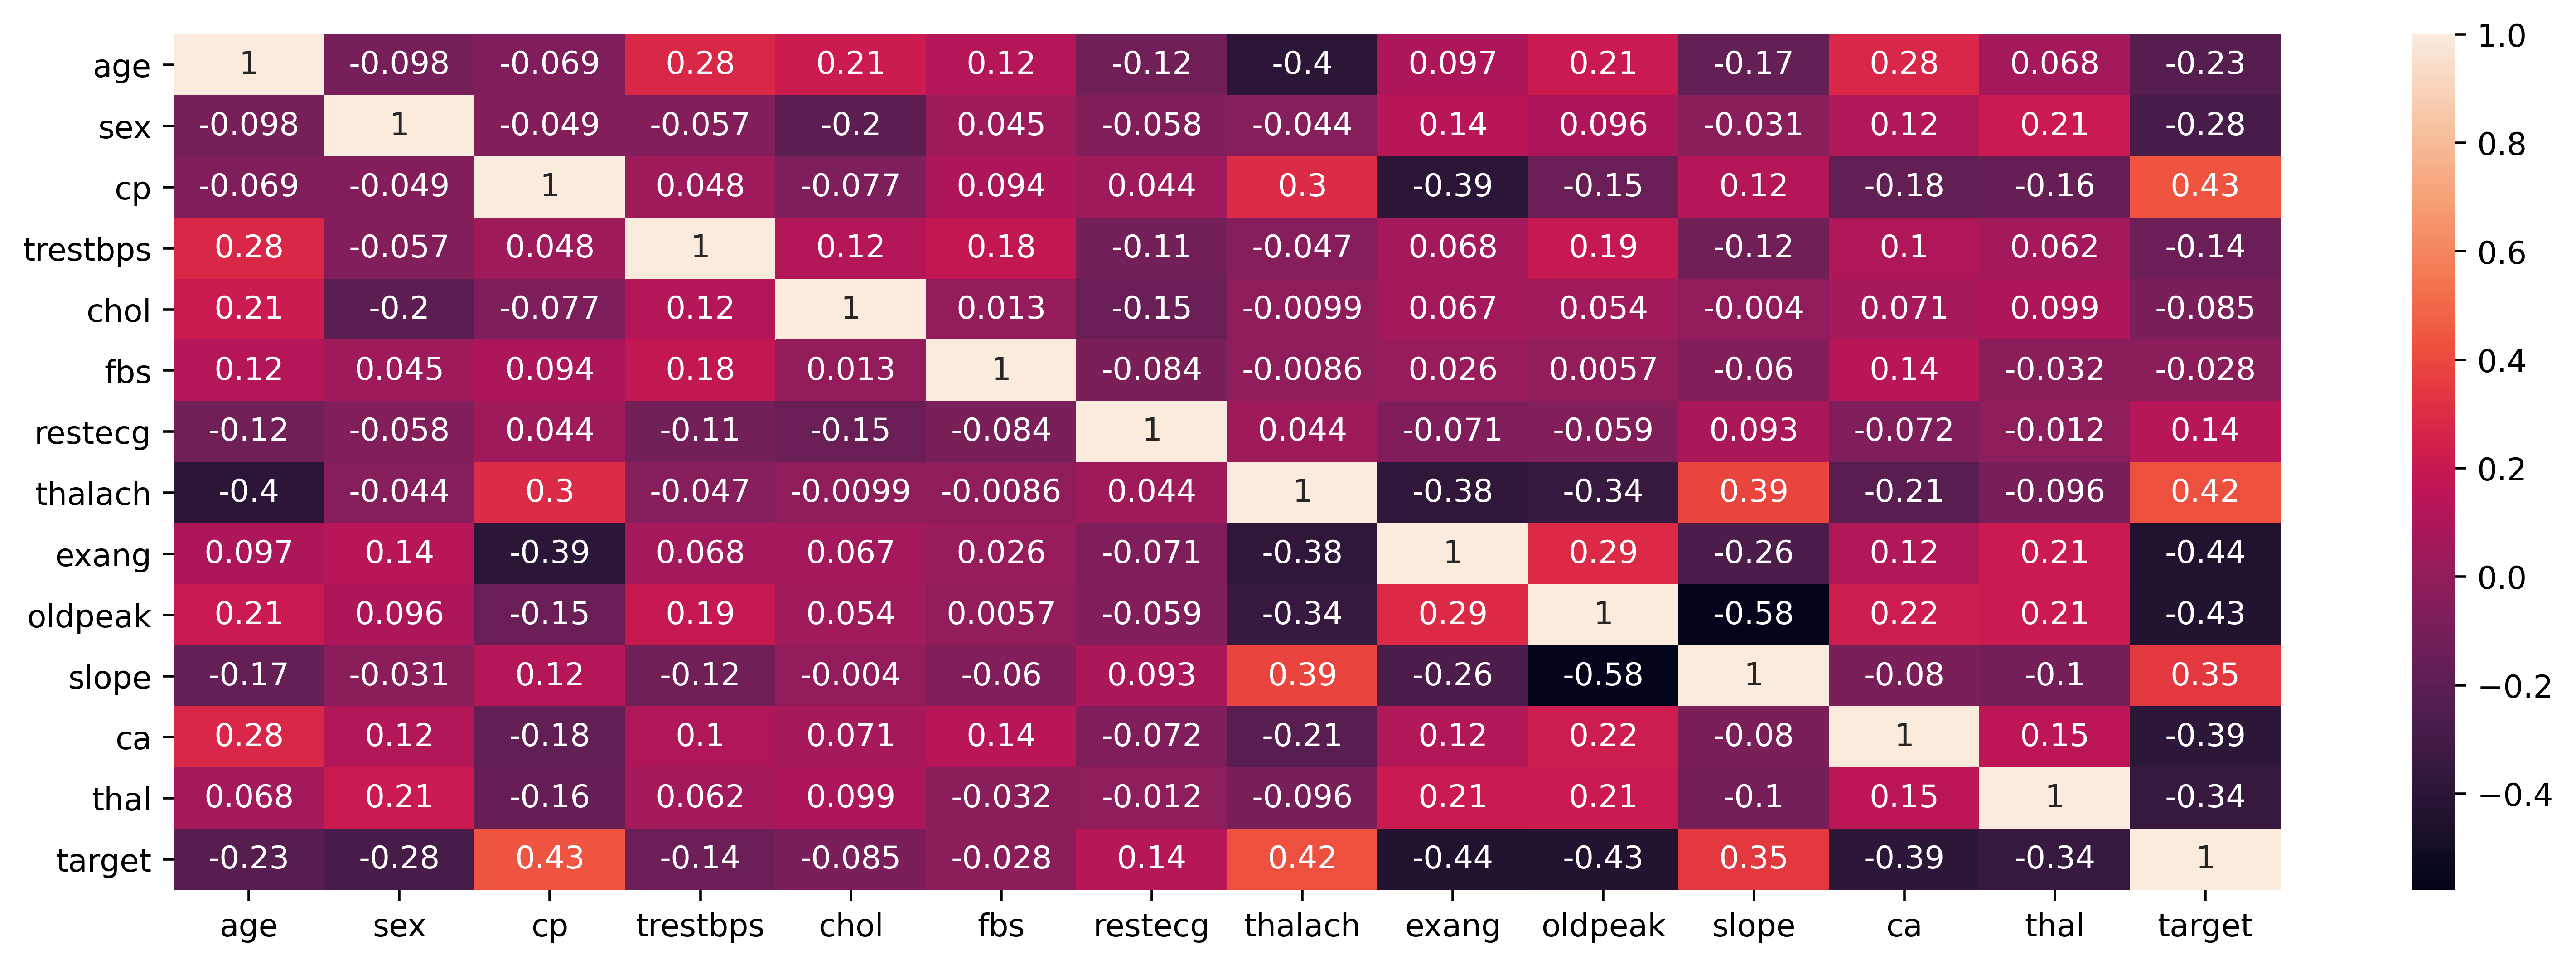

In [108]:
# Use heatmap to see correlation between features
plt.figure(figsize=(15,5),dpi=500)
sns.heatmap(df.corr(),annot=True);

In [109]:
# Features that have continuous number or not a categorical data
df_simp=df[['age','restecg','thalach','cp','slope','target']]

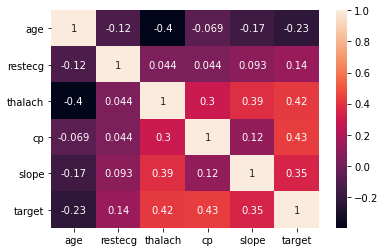

In [110]:
# Find correlation by using heatmap for continuous features
sns.heatmap(df_simp.corr(),annot=True);

Max heart rate, chest pain type affect the target greatly

**Visualize a continuous features**

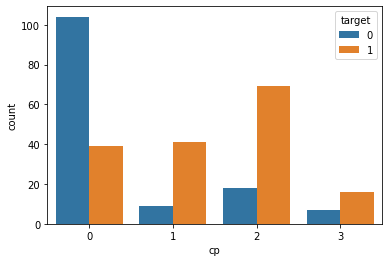

In [111]:
# Total target of heart disease for each type of Chest pain 
sns.countplot(x='cp',data=df,hue='target');

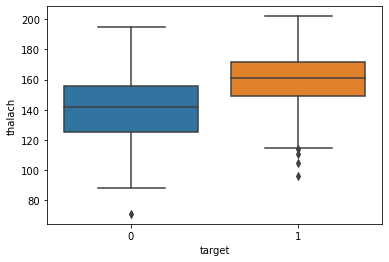

In [112]:
# Find if there are outliers for maximum heart rate achieved by its target
sns.boxplot(x='target',y='thalach',data=df);

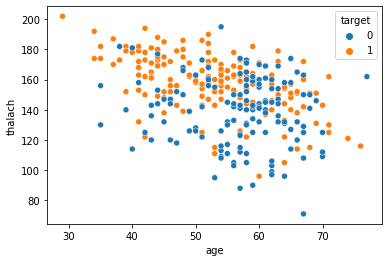

In [113]:
# Scatter plot for age and maximum heart rate achieved
sns.scatterplot(x='age',y='thalach',data=df_simp,hue='target');

Higher level of cp, higher posibility of heart disease

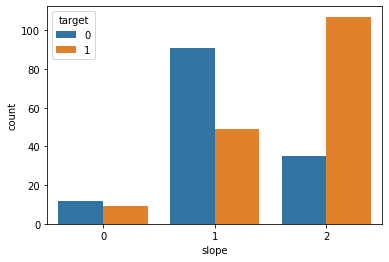

In [114]:
# Total target of heart disease for each type of the slop of the peak exercise ST segment
sns.countplot(x='slope',data=df,hue='target');

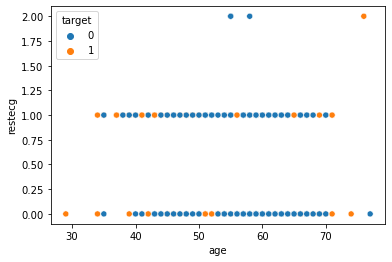

In [115]:
# Scatter plot for age and its resting elecrocrdiographic results
sns.scatterplot(x='age',y='restecg',data=df,hue='target');

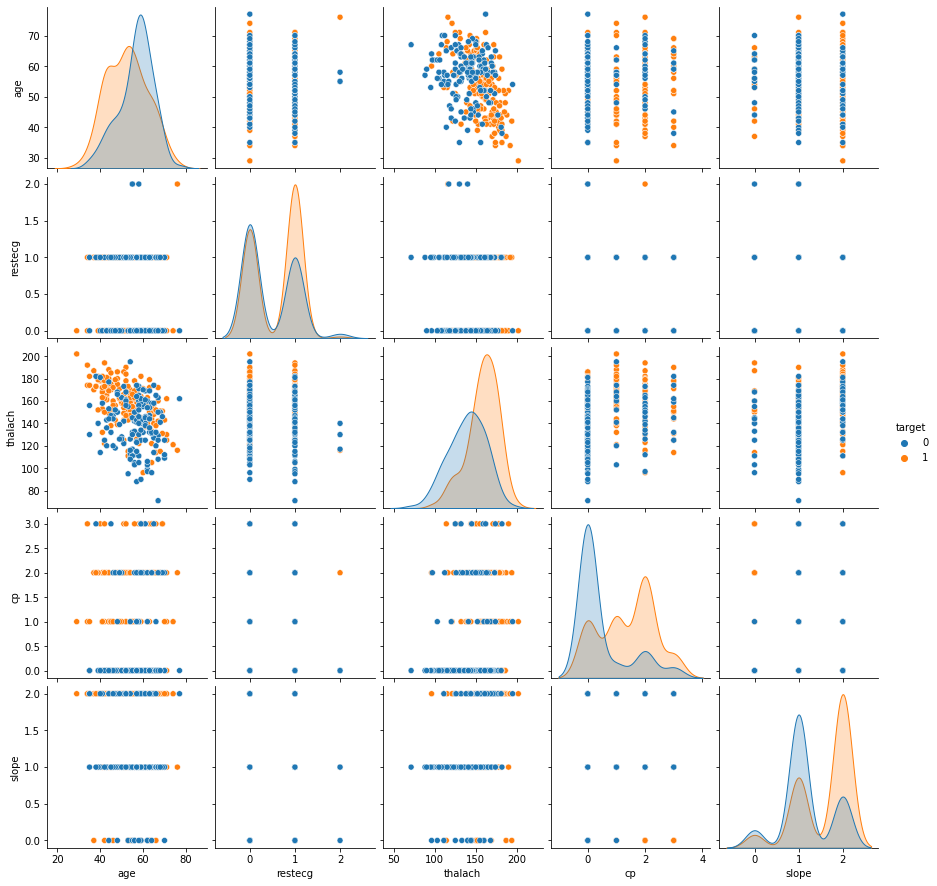

In [116]:
sns.pairplot(data=df_simp,hue='target');

# Data Cleaning

In [183]:
#using zscore to detect outliers
z = np.abs(stats.zscore(df))
z

array([[0.9521966 , 0.68100522, 1.97312292, ..., 0.71442887, 2.14887271,
        0.91452919],
       [1.91531289, 0.68100522, 1.00257707, ..., 0.71442887, 0.51292188,
        0.91452919],
       [1.47415758, 1.46841752, 0.03203122, ..., 0.71442887, 0.51292188,
        0.91452919],
       ...,
       [1.50364073, 0.68100522, 0.93851463, ..., 1.24459328, 1.12302895,
        1.09345881],
       [0.29046364, 0.68100522, 0.93851463, ..., 0.26508221, 1.12302895,
        1.09345881],
       [0.29046364, 1.46841752, 0.03203122, ..., 0.26508221, 0.51292188,
        1.09345881]])

In [184]:
# Create a new dataframe that contain zscore less than 3
df1 = df[(z < 3).all(axis=1)]

In [185]:
# Total number of rows and columns that contain zscore less thn 3
df1.shape

(287, 14)

In [186]:
# Check the missing value and data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trestbps  287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalach   287 non-null    int64  
 8   exang     287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    int64  
 11  ca        287 non-null    int64  
 12  thal      287 non-null    int64  
 13  target    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


In [187]:
# Since 'thal' should have only 3 types of unique data
df['thal'].mode()

0    2
dtype: int64

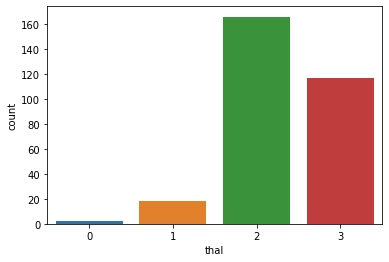

In [188]:
# Use count plot to see which unique number is the outlier
sns.countplot(x='thal',data=df);

In [189]:
# Replace value 0 to 2 or the highest total number of unique data
df1['thal'] = df1['thal'].replace([0],2)

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [190]:
# Since 'ca' should have only 4 types of unique data
df['ca'].mode()

0    0
dtype: int64

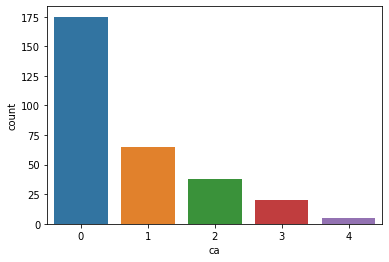

In [191]:
# Use count plot to see which unique number is the outlier
sns.countplot(x='ca',data=df);

In [192]:
df1['ca'] = df1['ca'].replace([4],0)

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Feature Engineering

In [193]:
# Change data types of all categorical features that have data types as int to category

df1['sex']=df1['sex'].astype('category')
df1['cp']=df1['cp'].astype('category')
df1['fbs']=df1['fbs'].astype('category')
df1['restecg']=df1['restecg'].astype('category')
df1['exang']=df1['exang'].astype('category')
df1['slope']=df1['slope'].astype('category')
df1['ca']=df1['ca'].astype('category')
df1['thal']=df1['thal'].astype('category')
df1['target']=df1['target'].astype('category')

C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Acer\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [194]:
df1.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

# Machine Learning

**Logistic Regression CV**

In [195]:
X = df1.drop('target',axis=1)
y = df1['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [196]:
from sklearn.linear_model import LogisticRegressionCV

In [197]:
model = LogisticRegressionCV()

In [198]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [199]:
model.C_

array([21.5443469])

In [200]:
y_pred = model.predict(X_test)

In [201]:
model.coef_

array([[ 0.05800885, -0.84122973,  0.76194159, -0.24476117, -0.27558314,
         0.18213476,  0.1812399 ,  0.59999219, -0.49010458, -0.52145705,
         0.4437573 , -1.16399802, -0.5996616 ]])

In [202]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [203]:
y_pred = model.predict(scaled_X_test)

In [204]:
# Model Accuracy
accuracy_score(y_test,y_pred)

0.896551724137931

In [205]:
confusion_matrix(y_test,y_pred)

array([[13,  1],
       [ 2, 13]], dtype=int64)

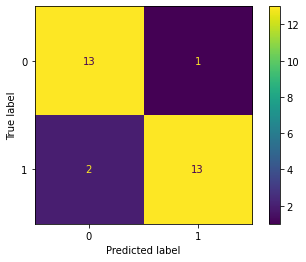

In [206]:
plot_confusion_matrix(model,scaled_X_test,y_test)

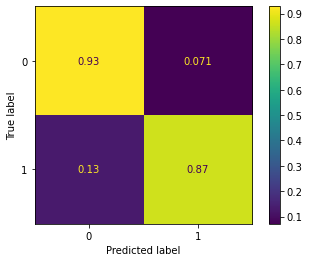

In [207]:
#scaled so highest value=1
plot_confusion_matrix(model,scaled_X_test,y_test,normalize='true')

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [209]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

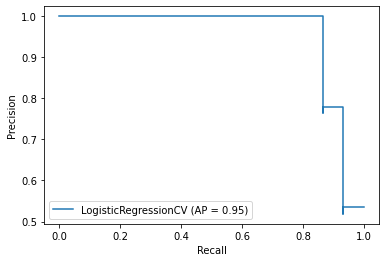

In [210]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

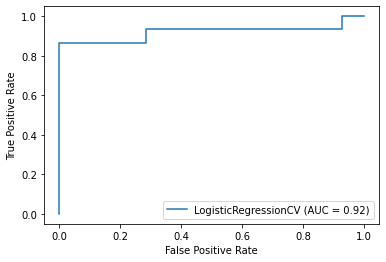

In [211]:
plot_roc_curve(model,scaled_X_test,y_test)

In [212]:
from joblib import dump, load

In [213]:
dump(model,'heart_model.h5')

['heart_model.h5']

In [214]:
dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

**Grid Search CV**

In [215]:
X = df1.drop('target',axis=1)
y = df1['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=500)

In [219]:
np.logspace(0,100,500)

array([1.00000000e+000, 1.58635653e+000, 2.51652705e+000, 3.99210913e+000,
       6.33290840e+000, 1.00462506e+001, 1.59369353e+001, 2.52816614e+001,
       4.01057288e+001, 6.36219849e+001, 1.00927151e+002, 1.60106446e+002,
       2.53985907e+002, 4.02912203e+002, 6.39162405e+002, 1.01393946e+003,
       1.60846948e+003, 2.55160607e+003, 4.04775697e+003, 6.42118571e+003,
       1.01862899e+004, 1.61590875e+004, 2.56340741e+004, 4.06647809e+004,
       6.45088409e+004, 1.02334021e+005, 1.62338243e+005, 2.57526333e+005,
       4.08528580e+005, 6.48071983e+005, 1.02807322e+006, 1.63089068e+006,
       2.58717408e+006, 4.10418050e+006, 6.51069356e+006, 1.03282813e+007,
       1.63843365e+007, 2.59913992e+007, 4.12316259e+007, 6.54080591e+007,
       1.03760502e+008, 1.64601150e+008, 2.61116110e+008, 4.14223247e+008,
       6.57105755e+008, 1.04240401e+009, 1.65362441e+009, 2.62323788e+009,
       4.16139055e+009, 6.60144909e+009, 1.04722519e+010, 1.66127252e+010,
       2.63537052e+010, 4

In [220]:
# Penalty Type
penalty = ['l1', 'l2']
# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0,100,500)

In [221]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [222]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+000, 1.58635653e+000, 2.51652705e+000, 3.99210913e+000,
       6.33290840e+000, 1.00462506e+001, 1.59369353e+001, 2.52816614e+001,
       4.01057288e+001, 6.36219849e+001, 1.00927151e+002, 1.60106446e+002,
       2.53985907e+002, 4.02912203e+002, 6.39162405e+002...
       2.45913043e+095, 3.90105762e+095, 6.18846824e+095, 9.81711702e+095,
       1.55734477e+096, 2.47050406e+096, 3.91910025e+096, 6.21709029e+096,
       9.86252179e+096, 1.56454759e+097, 2.48193029e+097, 3.93722633e+097,
       6.24584471e+097, 9.90813657e+097, 1.57178372e+098, 2.49340937e+098,
       3.95543624e+098, 6.27473213e+098, 9.95396231e+098, 1.57905331e+099,
       2.50494154e+099, 3.97373038e+099, 6.30375315e+099, 1.00000000e+100]),
                         'penalty': ['l1', 'l2']})

In [223]:
grid_model.best_params_

{'C': 15.936935303817753, 'penalty': 'l1'}

In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [225]:
y_pred = grid_model.predict(scaled_X_test)

In [226]:
accuracy_score(y_test,y_pred)

0.896551724137931

In [227]:
confusion_matrix(y_test,y_pred)

array([[13,  1],
       [ 2, 13]], dtype=int64)

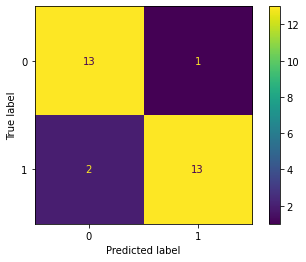

In [228]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

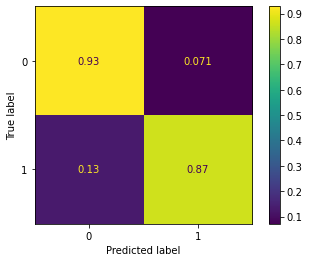

In [229]:
#scaled so highest value=1
plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [231]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

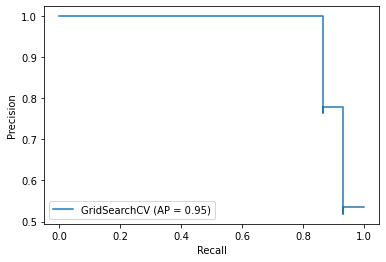

In [232]:
plot_precision_recall_curve(grid_model,scaled_X_test,y_test)

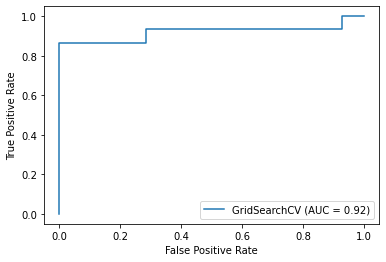

In [233]:
plot_roc_curve(grid_model,scaled_X_test,y_test)

**Since both of this Linear Regression CV and Grid Search gave the same value of accuracy, we will choose Linear Regression CV as our best model by its C value**

# Coefficient Plot for Best Model

In [166]:
coef = model.coef_
coef

array([[ 0.05800885, -0.84122973,  0.76194159, -0.24476117, -0.27558314,
         0.18213476,  0.1812399 ,  0.59999219, -0.49010458, -0.52145705,
         0.4437573 , -1.16399802, -0.5996616 ]])

In [167]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [168]:
coef_sort={}

a=0

for i in coef[0]:
    coef_sort[X.keys()[a]]=coef[0][a]
    a=a+1

In [169]:
coef_sort

{'age': 0.05800884970888408,
 'sex': -0.8412297272658267,
 'cp': 0.7619415921274512,
 'trestbps': -0.24476116724258457,
 'chol': -0.27558313706848764,
 'fbs': 0.18213476116831057,
 'restecg': 0.18123990371502377,
 'thalach': 0.5999921893459773,
 'exang': -0.4901045772960487,
 'oldpeak': -0.5214570483612362,
 'slope': 0.44375730257992574,
 'ca': -1.1639980247843824,
 'thal': -0.5996615997803391}

In [170]:
coeff = pd.DataFrame(list(coef_sort.items()),columns=['Feature','Coefficient'])
coeff = coeff.sort_values('Coefficient')

<AxesSubplot:xlabel='Feature', ylabel='Coefficient'>

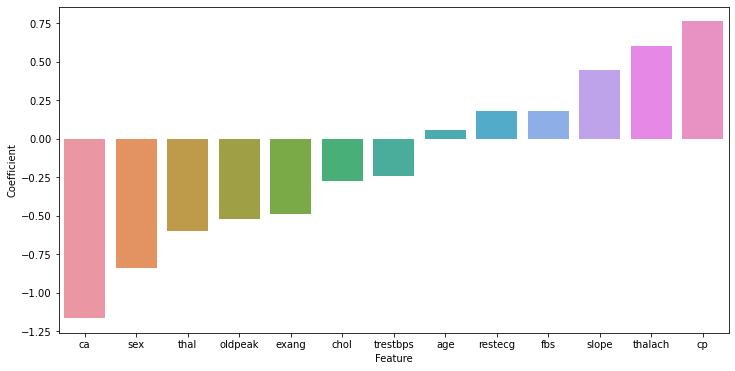

In [171]:
# Create a coefficient plot to see which features are importants
fig=plt.figure(figsize=(12,6))
sns.barplot(x='Feature',y='Coefficient',data=coeff)

# Model Deployment

In [172]:
heart_model = load("heart_model.h5") #loading the trained model

In [173]:
heart_scaler = load("heart_scaler.pkl") #loading the scaler

In [174]:
df1.head(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [175]:
heart_example = {'age':48,
                 'sex':0,
                 'cp':2,
                 'trestbps':130,
                 'chol':275,
                 'fbs':0,
                 'restecg':1,
                 'thalach':139,
                 'exang':0,
                 'oldpeak':0.2,
                 'slope':2,
                 'ca':0,
                 'thal':2}

In [176]:
heart_example.keys()

dict_keys(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [177]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    age = sample_json['age']
    sex = sample_json['sex']
    cp = sample_json['cp']
    restbp = sample_json['trestbps']
    chol = sample_json['chol']
    fbs = sample_json['fbs']
    restecg = sample_json['restecg']
    thalach = sample_json['thalach']
    exang = sample_json['exang']
    oldpeak = sample_json['oldpeak']
    slope = sample_json['slope']
    ca = sample_json['ca']
    thal = sample_json['thal']
    
    target = [[age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
    
    target = scaler.transform(target)
    
    prediction= model.predict(target)
    
    return prediction[0]

In [178]:
return_prediction(heart_model,heart_scaler,target_example)

1